In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customer_data=pd.read_csv('shoping.csv')
customer_data.shape

(200, 5)

In [3]:
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data=customer_data.iloc[:,3:5].values

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=10000)
kmeans.fit(data)
labels = kmeans.predict(data)

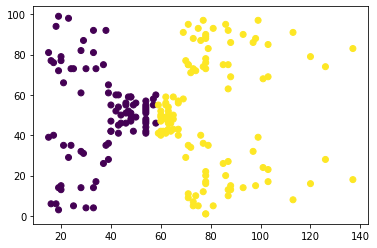

In [6]:
plt.scatter(data[:,0],data[:,1], c=labels)

In [7]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 20):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(data)
    labels=kmeans.predict(data)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(data,labels)

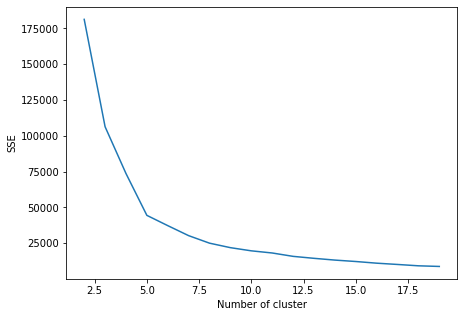

In [8]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

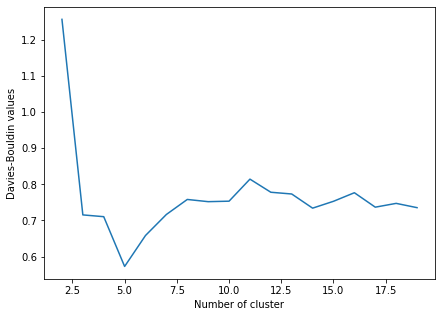

In [9]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, max_iter=10000)
kmeans.fit(data)
labels = kmeans.predict(data)

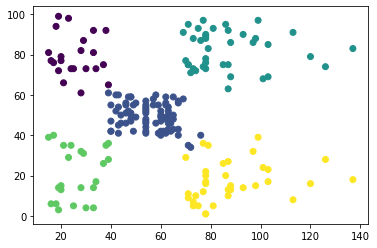

In [11]:
plt.scatter(data[:,0],data[:,1], c=labels)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=10000)
kmeans.fit(data)
labels = kmeans.predict(data)
#Accuracy metrics:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(data, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)
#print(labels)
    

Silhouetter Score: 0.554


In [ ]:
#print(data)